----------
multigraph False
no isolates
[[0. 0. 0. 5. 0. 0. 0. 8. 5. 2. 0. 0. 3. 5. 3. 0. 0. 0. 0. 0.]
 [0. 0. 3. 1. 0. 0. 0. 3. 5. 1. 1. 5. 5. 0. 8. 5. 9. 6. 2. 0.]
 [0. 3. 0. 2. 1. 0. 5. 0. 4. 1. 2. 6. 9. 0. 0. 8. 9. 8. 0. 7.]
 [5. 1. 2. 0. 9. 0. 6. 0. 6. 8. 9. 4. 1. 0. 0. 6. 4. 4. 0. 0.]
 [0. 0. 1. 9. 0. 0. 0. 0. 3. 2. 0. 6. 0. 3. 7. 0. 6. 0. 3. 6.]
 [0. 0. 0. 0. 0. 0. 1. 6. 5. 7. 4. 3. 7. 0. 3. 3. 0. 2. 0. 7.]
 [0. 0. 5. 6. 0. 1. 0. 2. 0. 0. 9. 8. 2. 5. 4. 4. 2. 0. 4. 0.]
 [8. 3. 0. 0. 0. 6. 2. 0. 0. 0. 5. 8. 9. 3. 0. 0. 4. 0. 6. 0.]
 [5. 5. 4. 6. 3. 5. 0. 0. 0. 4. 9. 4. 9. 6. 0. 9. 7. 4. 1. 0.]
 [2. 1. 1. 8. 2. 7. 0. 0. 4. 0. 0. 9. 0. 7. 0. 0. 4. 4. 4. 5.]
 [0. 1. 2. 9. 0. 4. 9. 5. 9. 0. 0. 0. 5. 0. 4. 0. 5. 0. 8. 6.]
 [0. 5. 6. 4. 6. 3. 8. 8. 4. 9. 0. 0. 0. 5. 6. 0. 0. 6. 2. 4.]
 [3. 5. 9. 1. 0. 7. 2. 9. 9. 0. 5. 0. 0. 0. 4. 4. 2. 4. 8. 4.]
 [5. 0. 0. 0. 3. 0. 5. 3. 6. 7. 0. 5. 0. 0. 9. 1. 6. 7. 0. 8.]
 [3. 8. 0. 0. 7. 3. 4. 0. 0. 0. 4. 6. 4. 9. 0. 4. 0. 2. 0. 8.]
 [0. 5. 8. 6. 0

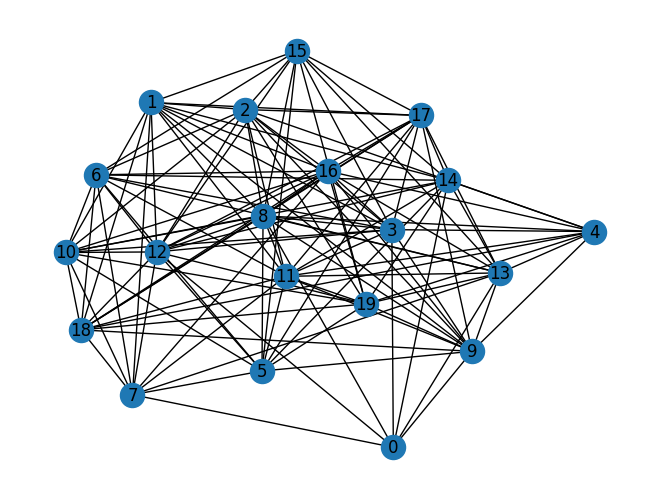

In [3]:
import numpy as np
import random as rd
import networkx as nx
import matplotlib.pylab as plt
verbose=True
def gen_graph():
	while True:
		if verbose:print('----------')
		Msize=rd.randint(5,20)
		M=np.random.randint(0,10,(Msize,Msize))
		#print(M)
		for i in range(Msize):
			for j in range(Msize):
				if(rd.randint(0,100)>50):
					M[i,j]=0
		G=nx.from_numpy_array(M)

		G.remove_edges_from(list(nx.selfloop_edges(G)))

		if not nx.is_directed_acyclic_graph(G):
			#if verbose:print("not DAG")
			if not (G.is_multigraph()):
				if verbose:print('multigraph',G.is_multigraph())\
				
				if nx.is_connected(G):
					if nx.number_of_isolates(G)==0:
						if verbose:print('no isolates')
						break
	M=nx.to_numpy_array(G)
	M=np.triu(M)

	return nx.from_numpy_array(M)

G1=gen_graph()	



M1=nx.to_numpy_array(G1)
G1=nx.from_numpy_array(M1)

np.savetxt('Mapa.csv',M1,delimiter=',')
if verbose:
	edge_colors = M1[np.triu_indices_from(M1)]
	edges=np.ones((edge_colors.shape[0],4))
	#print(edge_colors)
	pos = nx.spring_layout(G1)
	#print(pos)
	#nx.draw(G1, pos=pos, with_labels=True, edge_color=edges)
	print(M1)
	nx.draw(G1,with_labels = True)
	plt.show()

In [4]:
def Dijkstra(Madyacencia, start,end):
	i=0
	Dis_nodes=-1*np.ones(Madyacencia.shape[0])
	Dis_nodes[start]=0
	#print(Dis_nodes)
	current_node=start
	current_distance=0
	visited_nodes=[current_node]
	while True:
		i+=1

		conexion=Madyacencia[current_node]
		Notfound=True
		while Notfound:
			conexion=np.where(conexion!=0,conexion,999)
			new_node=np.argmin(conexion)
			print(conexion)
			print(new_node)
			if not(new_node in visited_nodes):
				Notfound=False
				visited_nodes.append(new_node)
				current_node=new_node
			else:
				conexion[new_node]=999

		if current_node==end:
			break
		if i==5:
			break



[999   3 999   2 999]
3
[  2   4   1 999 999]
2
[999   3 999   1   2]
3
[999   3 999 999   2]
4


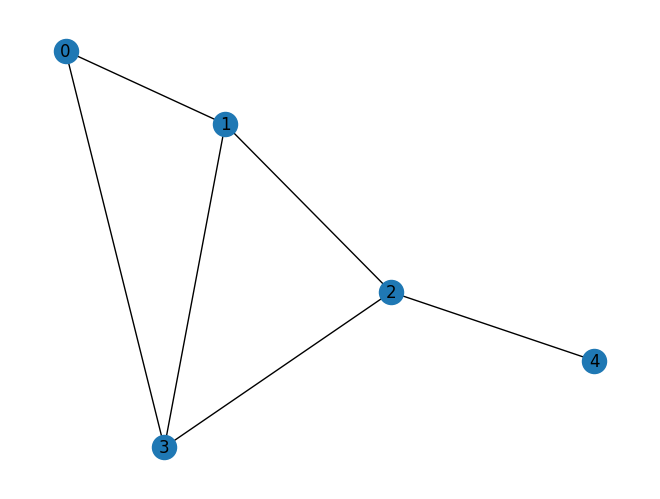

In [5]:
Ma=np.array((
	[0,3,0,2,0],
	[3,0,3,4,0],
	[0,3,0,1,2],
	[2,4,1,0,0],
	[0,0,2,0,0]
))
Dijkstra(Ma,0,4)
G=nx.from_numpy_array(Ma)
nx.draw(G,with_labels = True)

In [13]:

def find_u(Q,dist):
	u=0
	distu=999
	for i in Q:
		if dist[i]<distu:
			u=i
			distu=dist[i]

	return u



def path(Madyacencia, start,end):

	Ma=np.copy(Madyacencia)
	Graph_edges=np.ones(Ma.shape)*9999
	dist=np.ones(Ma.shape[0])*9999
	prev=np.ones(Ma.shape[0])*9999
	Q=np.arange(Ma.shape[0])
	dist[start]=0
	
	while (Q.size>0):
		u=find_u(Q,dist)
		Q = np.delete(Q, np.where(Q == u))

		for v in range(Ma.shape[0]):
			if v in Q:
				alt=dist[u]+Ma[u,v]
				if alt<dist[v]:
					dist[v]=alt
					prev[v]=u

	S=[]
	u=end
	notfound=True
	print(prev)
	try:
		while notfound:
			S.insert(0,u)
			u=int(prev[u])
	except:
		print("ruta")

	print(S)






        
        



[9.999e+03 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
ruta
[9999, 0, 5]
[0, 1, 6, 16, 5]


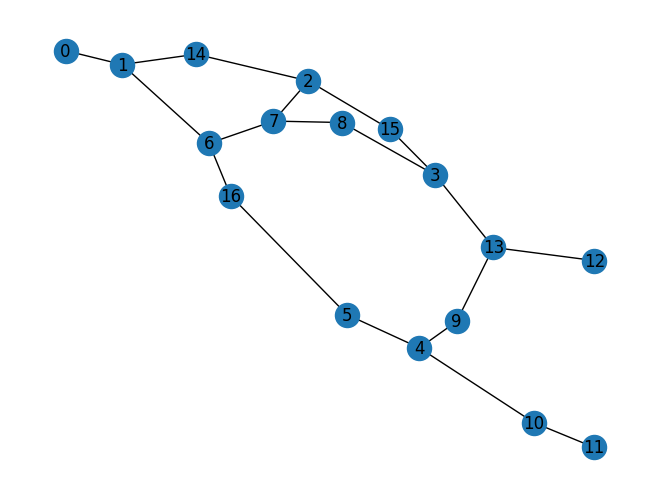

In [17]:
Mad=np.loadtxt("Madyacencia.txt", delimiter=',')
start=0
end=5
path(Mad,start,end)
G=nx.from_numpy_array(Mad)
nx.draw(G,with_labels = True)
print(nx.shortest_path(G,source=start,target=end, weight='weight'))